K-means clustering aims to partition n observations into k clusters, where each observation belongs to the cluster with the nearest mean. The "means" in K-means refers to the centroids of the clusters, which are the arithmetic averages of the data points in each cluster.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
np.random.seed(42)

In [16]:
#generate synthetic data

X= np.random.rand(100,2)

In [17]:
# apply K-means clustering with 7 clusters

kmeans= KMeans(n_clusters=7, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=7, random_state=42)

In clustering, a cluster label refers to the identifier assigned to each data point, indicating which cluster it belongs to. When you apply a clustering algorithm like K-means, the algorithm groups the data into clusters based on similarity or distance metrics, and each data point is then labeled according to its assigned cluster.

In [18]:
# predict cluster labels for the data
labels= kmeans.predict(X)

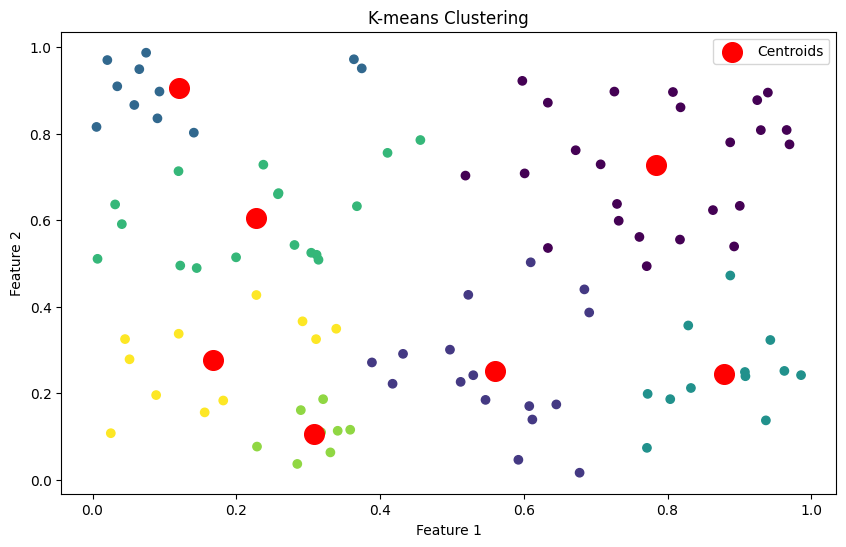

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis') #cmap stands for colormap
#Viridis is a perceptually uniform colormap, which means it is designed to be easily interpreted by the human eye.
#Colors transition smoothly without any sudden jumps or misleading gradients,
#making it an excellent choice for visualizing data.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend() #This command adds a legend to the plot, using the labels specified in the plot function.
plt.show()